In [140]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy
from scipy.fftpack import fft, ifft, fftshift
import math
from IPython.display import Audio
import librosa
import librosa.display
%matplotlib inline

In [124]:
def furie(sign, N):
    con_sig = np.zeros(N, dtype = np.complex64)
    k = 0
    while k < N:
        n = 0
        while n < len(sign):
            #con_sig[k] += sign[n] * (math.exp(np.complex64(-1j * 2 * math.pi * n / N)))
            con_sig[k] += sign[n] * (np.cos(math.pi * n * k * 2 / N) - 1j*np.sin(math.pi * n * k * 2 / N))
            n += 1
        k += 1
    return con_sig

In [125]:
x = np.array([2,2,0])
y = furie(x, 3)
y

array([4.+0.j       , 1.-1.7320508j, 1.+1.7320508j], dtype=complex64)

In [126]:
ye = fft(x,3)
ye

array([4.-0.j        , 1.-1.73205081j, 1.+1.73205081j])

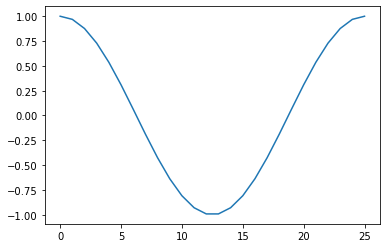

In [127]:
f = 4
fs = 100
t = np.arange(0, 10, 1/fs)
sin_sig = np.cos(2 * np.pi * t * f)
cos_sig = sin_sig[0:26]
plt.plot(cos_sig)

In [128]:
ere = furie(cos_sig,26)
ere

array([ 1.0000001e+00+0.0000000e+00j,  1.3126277e+01+1.5938188e+00j,
       -3.5629183e-01-8.7818444e-02j, -1.2480590e-01-4.7332700e-02j,
       -6.1499838e-02-3.2277461e-02j, -3.4656983e-02-2.3922058e-02j,
       -2.0755878e-02-1.8387960e-02j, -1.2684564e-02-1.4317918e-02j,
       -7.6619852e-03-1.1100026e-02j, -4.4154502e-03-8.4130121e-03j,
       -2.3008287e-03-6.0664969e-03j, -9.7036368e-04-3.9373911e-03j,
       -2.3535457e-04-1.9382631e-03j,  0.0000000e+00+1.1588531e-14j,
       -2.3535457e-04+1.9382631e-03j, -9.7036368e-04+3.9373911e-03j,
       -2.3008287e-03+6.0664969e-03j, -4.4154502e-03+8.4130121e-03j,
       -7.6619852e-03+1.1100026e-02j, -1.2684564e-02+1.4317918e-02j,
       -2.0755878e-02+1.8387960e-02j, -3.4656983e-02+2.3922058e-02j,
       -6.1499838e-02+3.2277461e-02j, -1.2480590e-01+4.7332700e-02j,
       -3.5629183e-01+8.7818444e-02j,  1.3126277e+01-1.5938188e+00j],
      dtype=complex64)

In [129]:
wer = fft(cos_sig,26)
wer

array([ 1.00000000e+00-0.j        ,  1.31262791e+01+1.59381884j,
       -3.56292009e-01-0.08781809j, -1.24805921e-01-0.04733264j,
       -6.14998409e-02-0.03227761j, -3.46570923e-02-0.02392206j,
       -2.07557729e-02-0.01838801j, -1.26845350e-02-0.01431788j,
       -7.66190199e-03-0.01110018j, -4.41546830e-03-0.00841297j,
       -2.30068876e-03-0.00606642j, -9.70478297e-04-0.00393739j,
       -2.35345316e-04-0.00193824j,  2.22044605e-15-0.j        ,
       -2.35345316e-04+0.00193824j, -9.70478297e-04+0.00393739j,
       -2.30068876e-03+0.00606642j, -4.41546830e-03+0.00841297j,
       -7.66190199e-03+0.01110018j, -1.26845350e-02+0.01431788j,
       -2.07557729e-02+0.01838801j, -3.46570923e-02+0.02392206j,
       -6.14998409e-02+0.03227761j, -1.24805921e-01+0.04733264j,
       -3.56292009e-01+0.08781809j,  1.31262791e+01-1.59381884j])

In [36]:




#######Амплитудный и фазовые спектры





In [131]:
zap_path = "train_whistle.wav"
zap, sr = librosa.load(zap_path, sr=8000)
xFFT = fftshift(fft(zap, 29814))

In [132]:
xA = np.abs(xFFT)
xF = np.arctan2(np.imag(xFFT), np.real(xFFT))

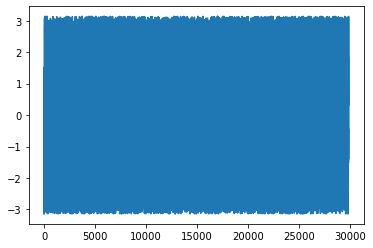

In [133]:
plt.plot(xF)

In [ ]:




########Гудок





In [43]:
zap_path = "train_whistle.wav"
zap, sr = librosa.load(zap_path, sr=8000)
xFFT = fftshift(fft(zap, 8000))

In [44]:
xA = np.abs(xFFT)

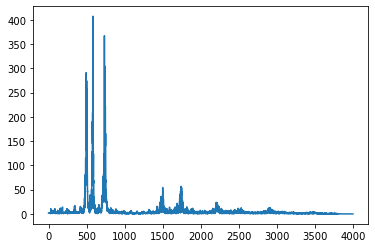

In [45]:
plt.plot(xA[4000:8000])

In [ ]:



#####Спутник




In [49]:
zap_path1 = "sputnik_1.wav"
zap, sr = librosa.load(zap_path1, sr=8000)

In [50]:
Audio(data=zap, rate=sr)

In [101]:
xFFT = fftshift(fft(zap, 8000))
xA = np.abs(xFFT)

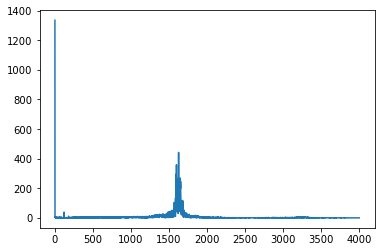

In [53]:
plt.plot(xA[4000:8000])

In [54]:
len(zap)

84660

In [99]:
r, b, c = scipy.signal.spectrogram(xA[5000:6500])

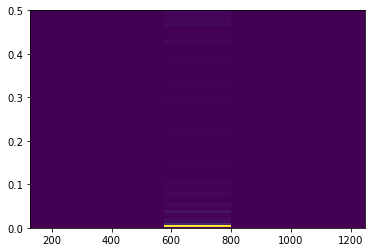

In [100]:
plt.pcolormesh(b, r, c)

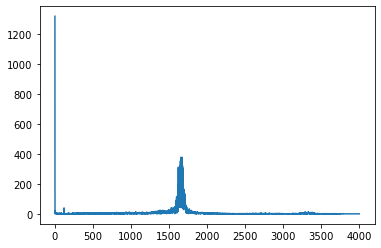

In [105]:
xFFT1 = fftshift(fft(zap[40000:60000], 8000))
xA1 = np.abs(xFFT1)
plt.plot(xA1[4000:8000])

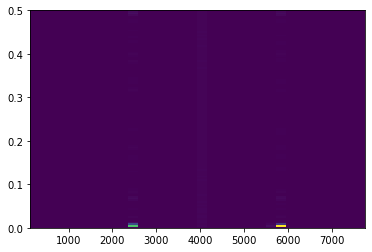

In [114]:
r, b, c = scipy.signal.spectrogram(xA1)
plt.pcolormesh(b, r, c)

In [ ]:




#####Телефон





In [18]:
dtmf, sr = librosa.load("dtmf.wav", sr=8000)
Audio(data=dtmf, rate=sr)

In [30]:
dt = dtmf[72000:86000]

In [46]:
dtmfF = fftshift(fft(dt, 8000))
# Magnitude spectrum
xA = np.abs(dtmfF)

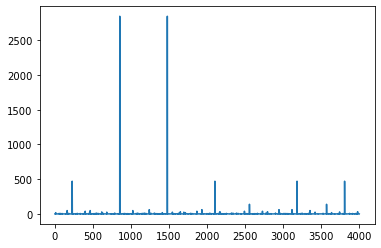

In [48]:
plt.plot(xA[4000:8000])

In [ ]:





######Какой спектр наиболее информативен






In [22]:
my_zap, sr = librosa.load("amy_zp.wav", sr=8000)
my_zap_AF = fftshift(fft(my_zap, 144000))
my_zap_A = np.abs(my_zap_AF)
my_zap_F = np.angle(my_zap_AF)
my_zap_A_0 = np.ones(len(my_zap_A))
my_zap_F_0 = np.zeros(len(my_zap_F))

In [23]:
new_A = np.zeros(len(my_zap_AF), dtype=np.complex64)
count = 0
while count < len(my_zap_AF):
    new_A[count] = complex(my_zap_A[count], my_zap_F_0[count])
    count += 1
new_A

array([0.00295639+0.j, 0.00281835+0.j, 0.00072743+0.j, ...,
       0.00426818+0.j, 0.00072743+0.j, 0.00281835+0.j], dtype=complex64)

In [24]:
new_F = np.zeros(len(my_zap_AF), dtype=np.complex64)
count = 0
while count < len(my_zap_AF):
    new_F[count] = complex(my_zap_A_0[count], my_zap_F[count])
    count += 1
new_F

array([1.-3.1415927j, 1.+2.8298547j, 1.-1.5099397j, ..., 1.-1.3168869j,
       1.+1.5099397j, 1.-2.8298547j], dtype=complex64)

In [25]:
new_zap_A = ifft(new_A)
new_zap_F = ifft(new_F)

In [26]:
Audio(data=my_zap, rate=sr)

In [27]:
Audio(data=new_zap_A, rate=sr)

In [28]:
Audio(data=new_zap_F, rate=sr)

In [32]:
new_zap_new = ifft(my_zap_AF)
Audio(data=new_zap_new, rate=sr)

In [ ]:




######MFCC





In [170]:
xm, sr = librosa.load("amy_zp.wav", sr=8000)
eerr = abs(fft(xm[40000:80000], 8000))
mfccs = librosa.feature.mfcc(eerr)

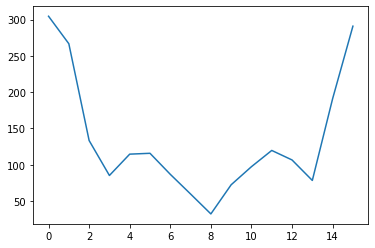

In [171]:
plt.plot(mfccs[0])